# CA04 – Ensemble Models 

##1.  Data Source and Contents 

Same as CA03 

In [0]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
#import decision tree model
from sklearn.tree import DecisionTreeClassifier

#import ensemble models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#Accuracy score
from sklearn.metrics import accuracy_score

### Read the dataset

In [2]:
#read datasets
data = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true",low_memory=False)
#look at the first 5 records
data.head()


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


### Data preprocessing

In [3]:
# splits hours per week 
hpw_new=data["hours_per_week_bin"].str.split(". ", n = 1, expand = True)
data['hours_per_week']=hpw_new[1]

#splitting Occupation
occ_new=data["occupation_bin"].str.split(". ",n=1, expand =True)
data["occupation"]=occ_new[1]

#marital status
msr_new=data["msr_bin"].str.split(". ",n=1, expand=True)
data["msr"]=msr_new[1]

#capitalgain/loss
cgb_new=data["capital_gl_bin"].str.split(". ",n=1, expand=True)
data["capital_gl"]=cgb_new[1]

#Race and sex

rs_new=data["race_sex_bin"].str.split(". ",n=1, expand=True)
data["race_sex"]=rs_new[1]

#education bin
edu_new=data["education_bin"].str.split(". ",n=1, expand=True)
data["education"]=edu_new[1]


#Age
age_new=data["age_bin"].str.split(". ",n=1, expand=True)
data["age"]=age_new[1]
data.head()


# and then remove the unnecessary columns
data = data.drop(['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','education_bin','age_bin','race_sex_bin','workclass_bin','education_num_bin'], axis=1)
data.head()

,flag,y,hours_per_week,occupation,msr,capital_gl,race_sex,education,age
0,train,0,31-40,Mid - Low,Mid,> 0,High,Bachelors,36-40 & 56-60
1,train,0,0-30,High,High,= 0,High,Bachelors,40-55
2,train,0,31-40,Low,Mid,= 0,High,Mid,36-40 & 56-60
3,train,0,31-40,Low,High,= 0,Mid,Low,40-55
4,train,0,31-40,High,High,= 0,Low,Bachelors,26-30 & 71-100


### Create Dummy variables

In [4]:
data = pd.get_dummies(data, columns=['hours_per_week', 'occupation', 'msr', 'capital_gl', 'race_sex', 'education', 'age'],drop_first=True)
data.head()

,flag,y,hours_per_week_31-40,hours_per_week_41-50 & 61-70,hours_per_week_51-60,hours_per_week_71-100,occupation_Low,occupation_Mid - High,occupation_Mid - Low,occupation_Mid - Mid,msr_Low,msr_Mid,capital_gl_= 0,capital_gl_> 0,race_sex_Low,race_sex_Mid,education_High,education_Low,education_Masters,education_Mid,age_26-30 & 71-100,age_31-35 & 61-70,age_36-40 & 56-60,age_40-55
0,train,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,train,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,train,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
3,train,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
4,train,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [0]:
#change column names for the xgboost model
data.columns=data.columns.str.replace('<','less')
data.columns=data.columns.str.replace('>','more')
data.columns=data.columns.str.replace('&','and')


### Split the Dataset into test and train

In [7]:
#Split data into training and test datasets
#Training data

data_train=data.loc[data['flag']=='train'] #select rows with flag as train
x_train=data_train.drop(['y','flag'], axis=1)

x_train.head()
y_train = data_train['y']

#Testing data
data_test=data.loc[data['flag']=='test'] #select rows with flag as train
x_test=data_test.drop(['y','flag'], axis=1)

y_test = data_test['y']

data_att = data.drop(['y','flag'], axis=1) # all the columns except outcome column 
data_income = data['y'] #crete a variable with income column of entire data set
# number of income > 50K in whole dataset:
print("Income >50K: %d out of %d (%.2f%%)" % (np.sum(data_income), len(data_income), 100*float(np.sum(data_income)) / len(data_income)))

Income >50K: 11687 out of 48842 (23.93%)


##  2. Finding Optimal Value of a key Hyper-parameter

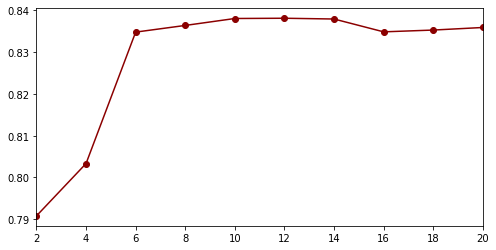

In [9]:
results=[] #create an empty list to store the accuracy scores using different hyper-parameters
max_depth_options=[2,4,6,8,10,12,14,16,18,20] # creating a list of different hyper-parameter options
for trees in max_depth_options: 
  model=DecisionTreeClassifier(max_depth=trees,random_state=101) #bulding the model
  model.fit(x_train,y_train) #fitting the model on training dataset
  y_pred=model.predict(x_test) #predicting
  accuracy=np.mean(y_test==y_pred) #calculate accuracy
  results.append(accuracy) #store accuracy in results list

#display how model performs with different hyper-parameters
plt.figure(figsize=(8,4)) 
pd.Series(results,max_depth_options).plot(color="darkred",marker='o')

## 3. Building a Random Forest Model

Using Notebook, and the same data source from CA03, train a Random Forest Model. Using similar approach of Section 2 above, plot a graph of Accuracy vs. n_estimator. Use n_estimator values as [50,100,150,200,250,300,350,400,450,500]. 

Text(0.5, 1.0, 'Random Forest')

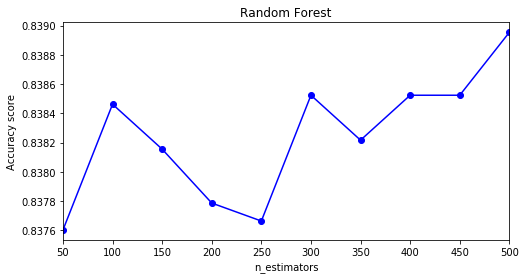

In [21]:
#Random Forest Classifier
results=[]
n_estimators_options=[50,100,150,200,250,300,350,400,450,500] # creating a list of n_estimator hyper-parameter options
for n in n_estimators_options:
  model=RandomForestClassifier(n_estimators=n,max_features='auto', random_state=101)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color="blue",marker='o')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy score")
plt.title("Random Forest")
#The line graph below displays how the model performs with different n_estimators

## 4. Building AdaBoost, Gradiant Boost Classifier Model and XGB models

## Build AdaBoost model

[0.8434985565997175, 0.8452183526810393, 0.8450340888151834, 0.8449726675265647, 0.8448498249493275, 0.845095510103802, 0.8451569313924207, 0.8451569313924207, 0.8451569313924207, 0.8451569313924207]


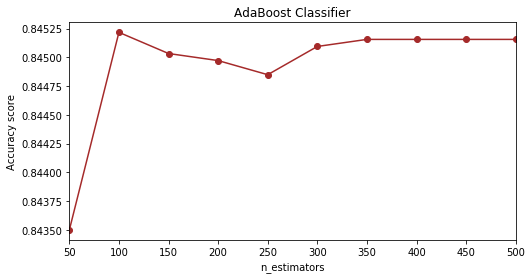

In [22]:

results=[]
n_estimators_options=[50,100,150,200,250,300,350,400,450,500]
for n in n_estimators_options:
  
  ab_model=AdaBoostClassifier(n_estimators=n,random_state=101) #Running Adaboost model
  ab_model.fit(x_train,y_train)
  y_pred=ab_model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color="brown",marker='o')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy score")
plt.title("AdaBoost Classifier")
print(results)
#Below line graph displays the best performing Adaboost model with different n_estimators

## Gradient Boost model

Text(0.5, 1.0, 'Gradient Boost Classifier')

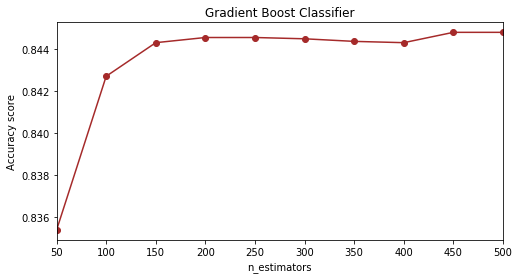

In [23]:
results=[]
n_estimators_options=[50,100,150,200,250,300,350,400,450,500]
for n in n_estimators_options:
  model=GradientBoostingClassifier(n_estimators=n,learning_rate=0.1,max_depth=2,random_state=0)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color="brown",marker='o')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy score")
plt.title("Gradient Boost Classifier")

## XG Boost Model

In [0]:
#import necessary libraries 
from sklearn import datasets
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

AUC 0.7573206571206154


Text(0.5, 1.0, 'XG Boost Classifier')

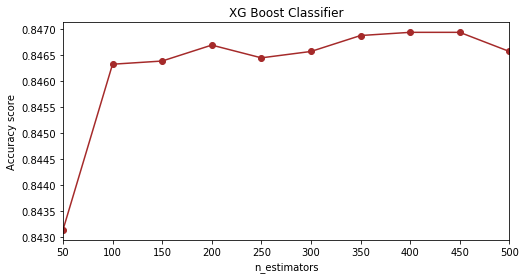

In [24]:
results=[]
n_estimators_options=[50,100,150,200,250,300,350,400,450,500]
for n in n_estimators_options:
  model=XGBClassifier(n_estimators=n, random_state=101)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color="brown",marker='o')
print("AUC", roc_auc_score(y_test,y_pred))
plt.xlabel("n_estimators")
plt.ylabel("Accuracy score")
plt.title("XG Boost Classifier")

## 5. Compare Performance

Using the best hyper-parameter from the random forest and keeping it common for all the models


In [0]:
#Random forest 
Random_state=101
n=500 #this parameter of n_estimator, Random_state  will be common for all the models

rf_model=RandomForestClassifier(n_estimators=n,max_features='auto', random_state=Random_state)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
rf_accuracy=np.mean(y_test==y_pred)
rf_auc=roc_auc_score(y_test,y_pred)

#AdaBoost
ab_model=AdaBoostClassifier(n_estimators=n,random_state=Random_state)
ab_model.fit(x_train,y_train)
y_pred=ab_model.predict(x_test)
ab_accuracy=np.mean(y_test==y_pred)
ab_auc=roc_auc_score(y_test,y_pred)

#Gradient Boost

model=GradientBoostingClassifier(n_estimators=n,learning_rate=0.1,max_depth=2,random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
gb_accuracy=np.mean(y_test==y_pred)
gb_auc=roc_auc_score(y_test,y_pred)

#XGBoost
xg_model=XGBClassifier(n_estimators=n, random_state=Random_state)
xg_model.fit(x_train,y_train)
y_pred=xg_model.predict(x_test)
xg_accuracy=np.mean(y_test==y_pred)
xg_auc=roc_auc_score(y_test,y_pred)


                            



In [20]:
#add the results into a dataframe table
performance_df=pd.DataFrame({'Random Forest': [rf_accuracy,rf_auc,n,Random_state],
                             'AdaBoost': [ab_accuracy,ab_auc,n,Random_state], 
                             'Gradient Boosting': [gb_accuracy,gb_auc,n,Random_state],
                             'XGBoost': [xg_accuracy,xg_auc,n,Random_state]}
                            ,index=['Accuracy','AUC','N_estimator','random_state'])
performance_df.round(3) # just display 3 digitsa after decimal

,Random Forest,AdaBoost,Gradient Boosting,XGBoost
Accuracy,0.839,0.845,0.845,0.847
AUC,0.747,0.747,0.751,0.757
N_estimator,500.000,500.000,500.000,500.000
random_state,101.000,101.000,101.000,101.000
